In [22]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
%matplotlib inline
import matplotlib.pyplot as plt
folderpath=r"C:\Users\Zoe\Desktop\maz-datenjournalismus\Daten_BR_Handelsreg"
folderpath_geo=r"C:\Users\Zoe\Desktop\maz-datenjournalismus\Geodaten"

# Finen und Laden der Karte der Gemeinden 
Hier gefunden:
https://www.bfs.admin.ch/bfs/de/home/dienstleistungen/geostat/geodaten-bundesstatistik/administrative-grenzen/generalisierte-gemeindegrenzen.html


In [24]:
gdf_gemeinden = gpd.read_file(folderpath_geo+'/ggg_2019-LV95/shp/g1a19.shp')

In [25]:
gdf_zg=gdf_gemeinden[gdf_gemeinden["AName"]=="Zug"]

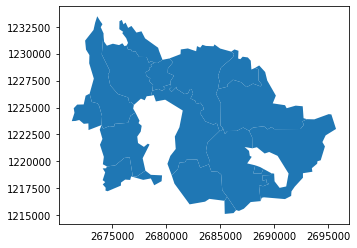

In [26]:
gdf_zg.plot()

## hier die Stadt Zug

In [25]:
gdf_stadtzug=gdf_zg[gdf_zg["GMDNAME"]=="Zug"]

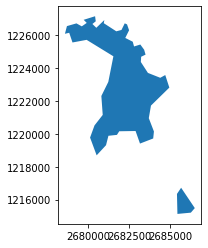

In [26]:
gdf_stadtzug.plot()

# File mit den HR-Daten 


In [28]:
df_sauber=pd.read_csv(folderpath+"/BRFrames/Stadt_Zug_sauber")

In [29]:
dfhr=df_sauber[["Adresse", "Anzahl", "GDENAME", "GKODE","GKODN"]]

In [30]:
dfhr["Anzahl"]=dfhr["Anzahl"].astype("int32")

C:\Users\Zoe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
dfhr.dtypes

Adresse     object
Anzahl       int32
GDENAME     object
GKODE      float64
GKODN      float64
dtype: object

In [32]:
# Nun nur jene Adressen rausfiltern, an welchen Firmen ansässig sind
dfhr_pl=dfhr[dfhr["Anzahl"]>0]

In [33]:
dfhr_pl

,Adresse,Anzahl,GDENAME,GKODE,GKODN
1,"Aabachstrasse 10, Zug",5,Zug,2681328.366,1225274.400
6,"Chamerstrasse 22, Zug",1,Zug,2681251.657,1225152.510
7,"Chamerstrasse 24, Zug",4,Zug,2681235.282,1225191.215
9,"Chamerstrasse 26, Zug",3,Zug,2681197.613,1225202.005
10,"Chamerstrasse 28, Zug",5,Zug,2681151.277,1225205.369
...,...,...,...,...,...
4683,"Chamerstrasse 173, Zug",1,Zug,2679251.202,1226140.591
4684,"Chamerstrasse 174, Zug",19,Zug,2679329.042,1226134.862
4685,"Chamerstrasse 175, Zug",18,Zug,2679236.637,1226168.313
4686,"Chamerstrasse 176, Zug",90,Zug,2679346.948,1226153.547


In [34]:
# Kreieren der Angabe der Geometrie. Mit Hilfe der Gemeindekoordinaten.
dfhr_pl['Punkt'] = dfhr_pl.apply(lambda row: Point(row["GKODE"], row["GKODN"]), axis=1)

C:\Users\Zoe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
gdf_hr=gpd.GeoDataFrame(dfhr_pl, geometry="Punkt")

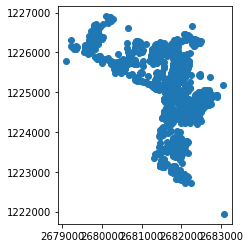

In [36]:
gdf_hr.plot()

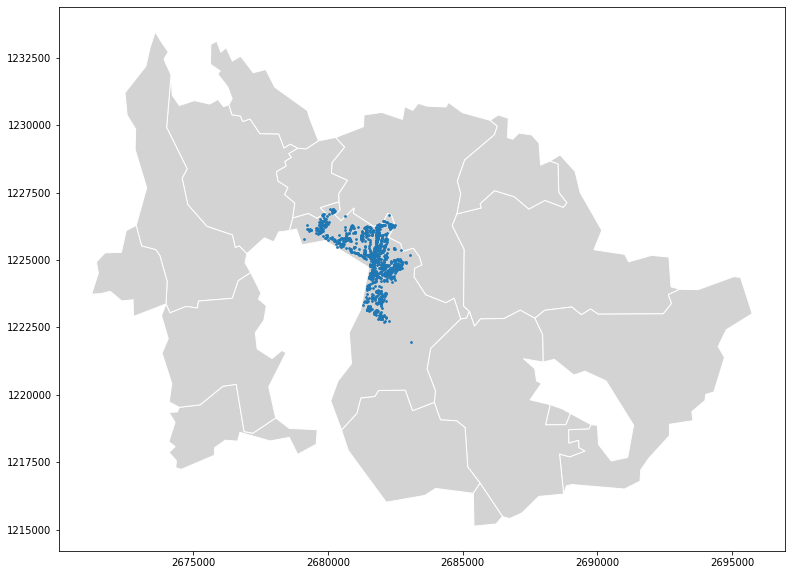

In [37]:
ax = gdf_zg.plot(figsize=(14,10), color='lightgrey', edgecolor='white')
gdf_hr.plot(figsize=(14,10), markersize=3, ax=ax)

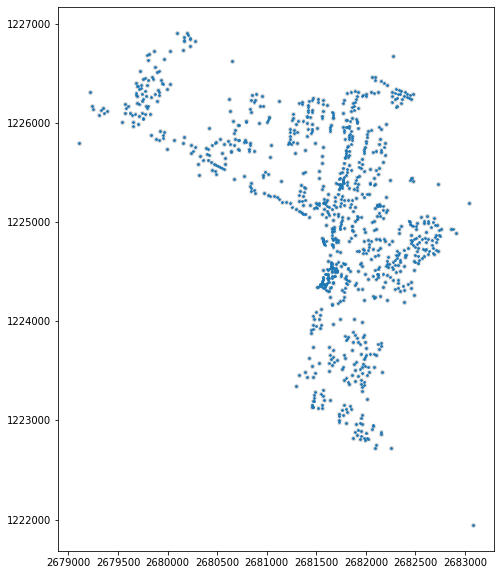

In [45]:
# Nun noch auf der Karte von der Stadt alleine
ax = gdf_hr.plot(figsize=(14,10), color='lightgrey', edgecolor='white')
gdf_hr.plot(figsize=(14,10), markersize=3, ax=ax)

### Punkte in unterschiedlicher Grösse

AttributeError: 'PathCollection' object has no property 'title'

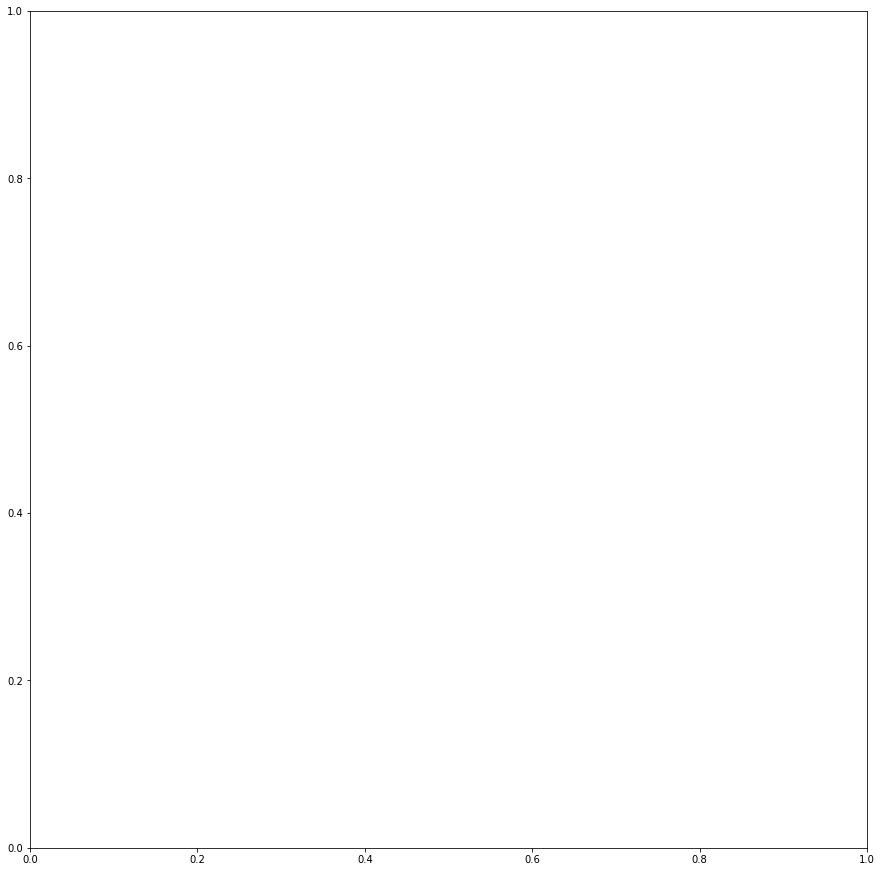

In [54]:
gdf_hr.plot(markersize=gdf_hr['Anzahl'], figsize=(15,20))

Text(0.5, 1, 'Firmensitze in der Stadt Zug')

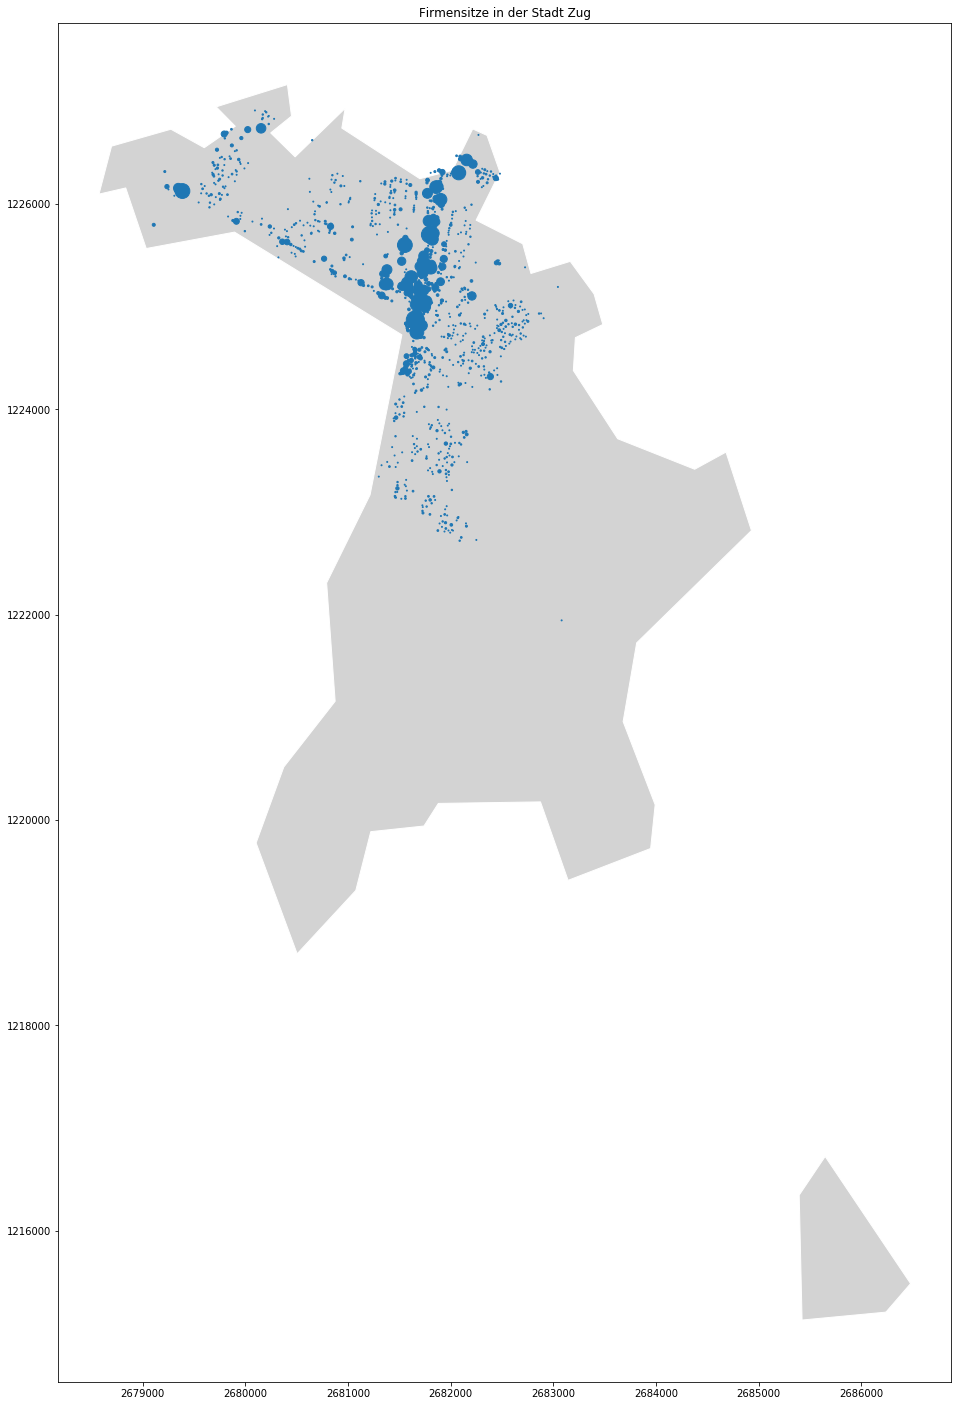

In [60]:
ax = gdf_stadtzug.plot(figsize=(20,25), color='lightgrey', edgecolor='white')
gdf_hr.plot(figsize=(20,25), markersize=gdf_hr['Anzahl'], ax=ax)
ax.set_title("Firmensitze in der Stadt Zug")

### Karte mit Strassen
um es für die Grafik einfacher zu machen, versuche ich die Punkte nun noch auf eine Strassenkarte zu plotten.

In [12]:
gdf_strassen = gpd.read_file(folderpath_geo+'\Kanton_Zug_Strassen\shapefiles\kantonale_ausnahmetransportrouten\\route.shp')

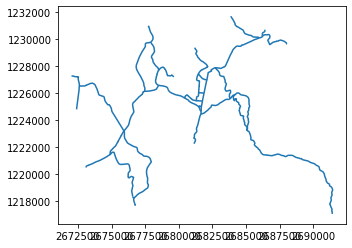

In [14]:
gdf_strassen.plot()

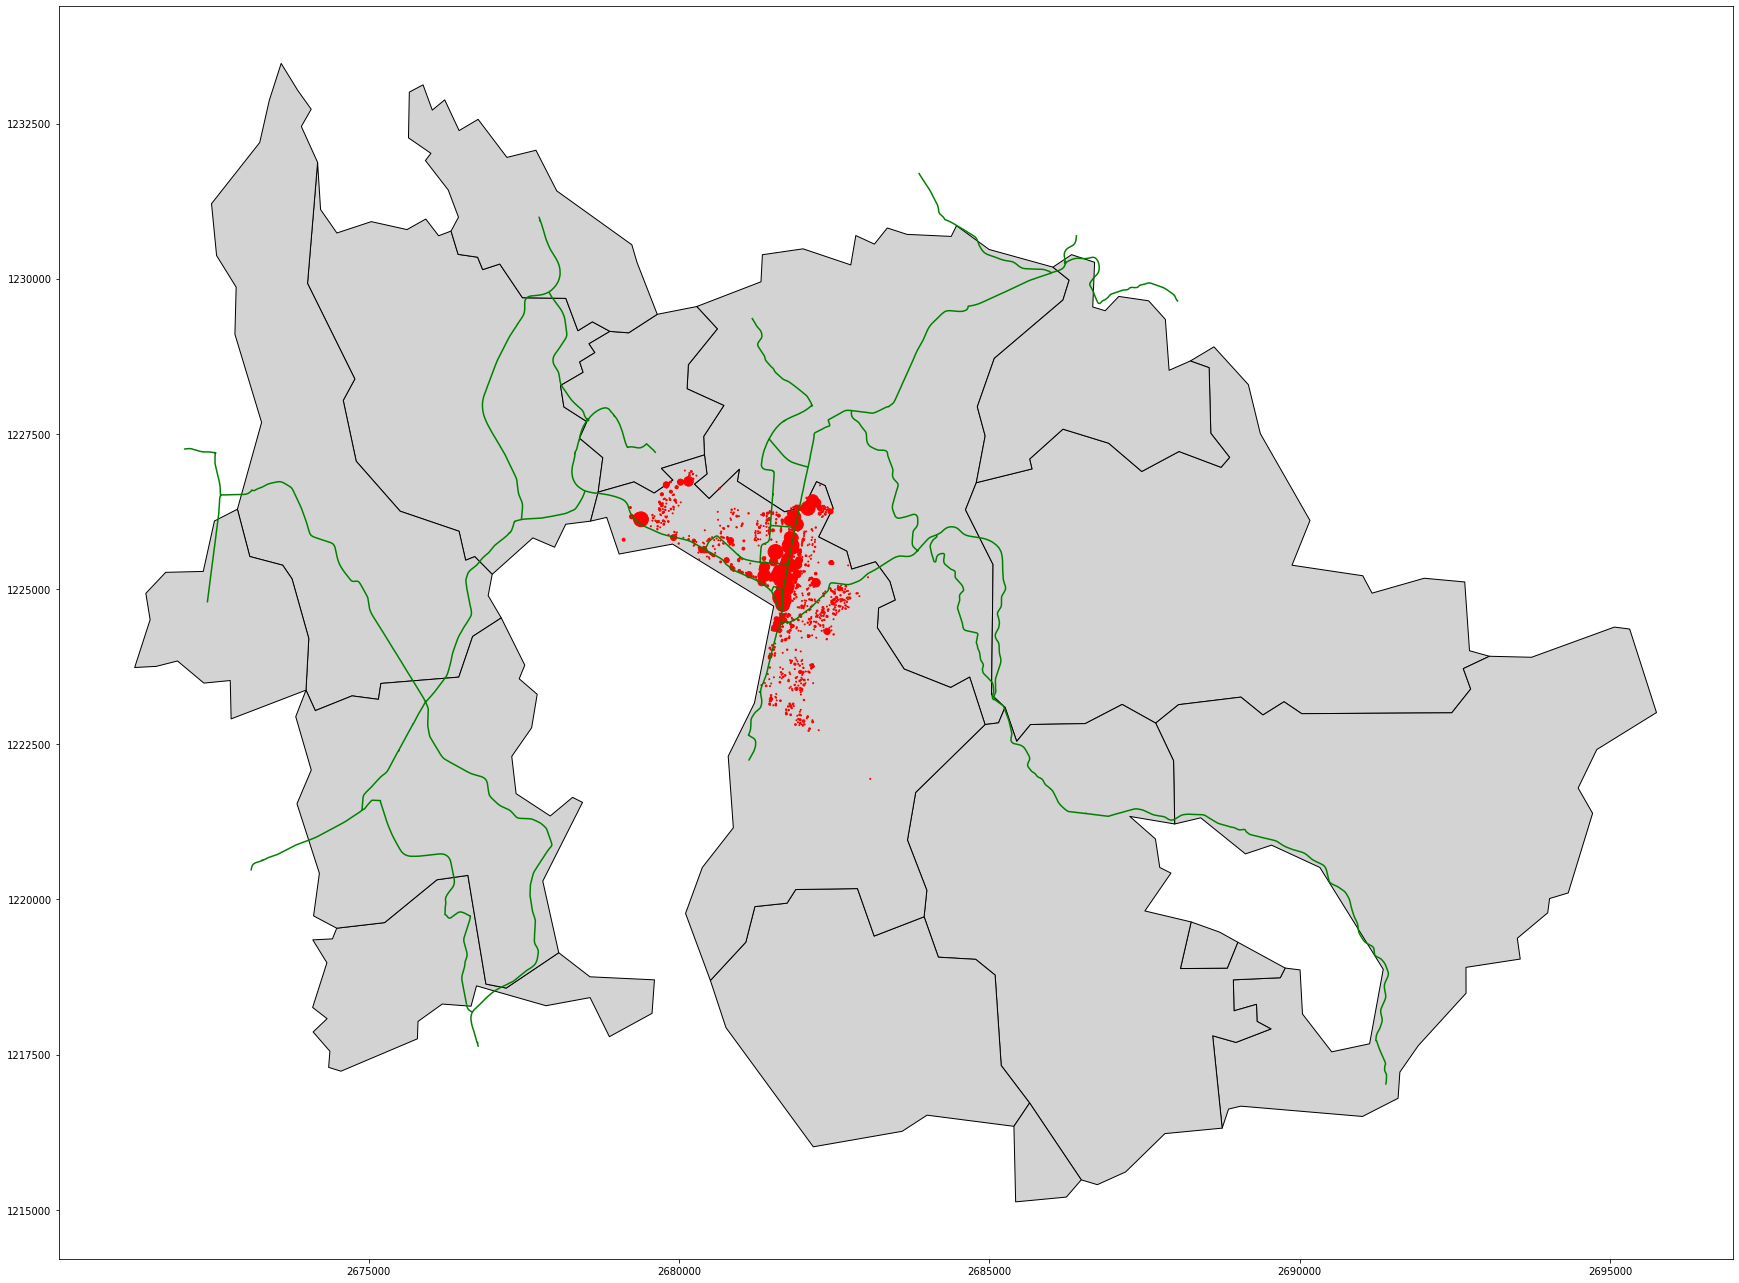

In [43]:
fig, ax = plt.subplots(figsize=(30,40))
gdf_strassen.plot(ax=ax, color='green', edgecolor='black', figsize=(20,30))

gdf_zg.plot(ax=ax, color='lightgrey', markersize=5,edgecolor='black', figsize=(20,30))

gdf_hr.plot(ax=ax, marker='o', color='red', markersize=gdf_hr['Anzahl'], figsize=(20,30))

plt.show()



In [18]:
gdf_landeskarte = gpd.read_file(folderpath_geo+'\Landeskarte\geothermie.shp')

In [20]:
gdf_landeskarte

,ID,CONTOUR,NAME,geometry
0,1,100,100,"LINESTRING (680700.000 282152.964, 680731.250 ..."
1,2,100,100,"LINESTRING (697366.672 281190.000, 696829.028 ..."
2,3,110,110,"LINESTRING (710477.786 281190.000, 710464.709 ..."
3,4,100,100,"LINESTRING (640700.000 273140.001, 640716.258 ..."
4,5,80,80,"LINESTRING (632752.628 271190.000, 632720.615 ..."
...,...,...,...,...
92,93,20,20,"LINESTRING (692144.443 96190.000, 692179.996 9..."
93,94,30,30,"LINESTRING (695979.999 96190.000, 696025.577 9..."
94,95,40,40,"LINESTRING (655700.000 119017.591, 655981.693 ..."
95,96,50,50,"LINESTRING (700700.000 92502.500, 701054.843 9..."


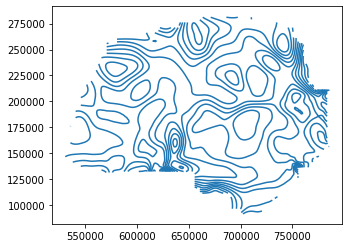

In [19]:
gdf_landeskarte.plot()

In [ ]:
ax = gdf_zg.plot(figsize=(14,10), color='lightgrey', edgecolor='white')
gdf_hr.plot(figsize=(14,10), markersize=3, ax=ax)